## Regression Model for Startup Profit Prediction

### Introduction:

In today's competitive business landscape, startups are constantly seeking ways to maximize their profitability and gain a competitive edge. Predicting the potential profit of a startup is crucial for making informed decisions regarding investment, resource allocation, and strategic planning. In this project, we aim to develop a predictive model using linear regression techniques to forecast the profit of startup companies based on various factors such as R&D spending, administration costs, marketing expenditure, and geographic location.


### Problem Statement:

The objective of this project is to create a predictive model that accurately estimates the profit of startup companies in the USA. Leveraging a dataset containing information on 50 startup companies, including their R&D spending, administration costs, marketing expenditure, and state of operation, we will build a linear regression model capable of predicting the profit based on these input variables. The model will enable stakeholders, including investors and management teams, to make data-driven decisions and identify factors that significantly impact startup profitability.





### Dataset Description:

The dataset comprises records of 50 startup companies operating in various states across the USA. Each record contains the following features:

- **R&D Spend:** The amount of money spent on research and development.
- **Administration:** The expenditure on administrative activities.
- **Marketing Spend:** The investment in marketing and promotional activities.
- **State:** The state in which the startup operates.
- **Profit:** The net profit earned by the startup.

### Following steps are followed in the case study

- **Reading, Understanding and the data**
- **Visualising the data**
- **Preparing the data for modelling (train-test split, rescaling etc.)**
- **Training the model**
- **Residual analysis**
- **Prediction and evaluation on the test set**

## Import required libraries

In [1]:
# Bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import numpy, pandas and matplotlib visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Import libraries required for regression modelling

import statsmodels
import sklearn

#

## Step1: Reading and Understanding the data

In [4]:
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Different elements in a State column 
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

<span style="color:Green">
    
### Observation from above:
- There are 5 columns: R&D Spend, Administration, Marketing Spend, State and Profit. And each column having 50 entries and no null values.
- State column has 3 different values: New York, California, Florida which makes it as catagorical column


#

## Step 2: Data Visualisation

### 2.1: Distribution of values across different columns

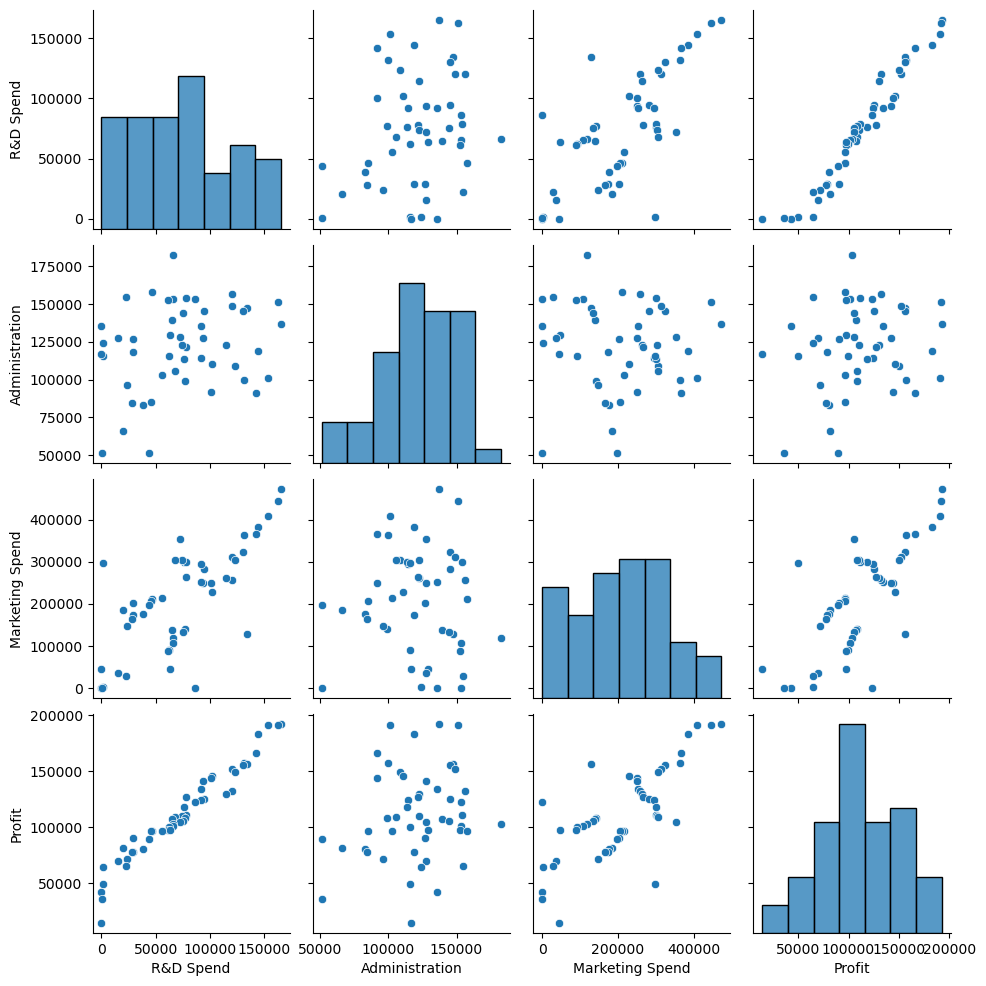

In [8]:
# Plotting pairplot to see the distribution of values across different columns
sns.pairplot(startup)
plt.show()

<span style="color:Green">
    
### Observation from above:
- Scatter plot shows linear relation when graph plotted between Profit, R&D Spend and Marketing Spend columns
- Administration column shows no clear linear correlation with other columns

#

### 2.2: 'State' catagorical variables column with respect to other columns

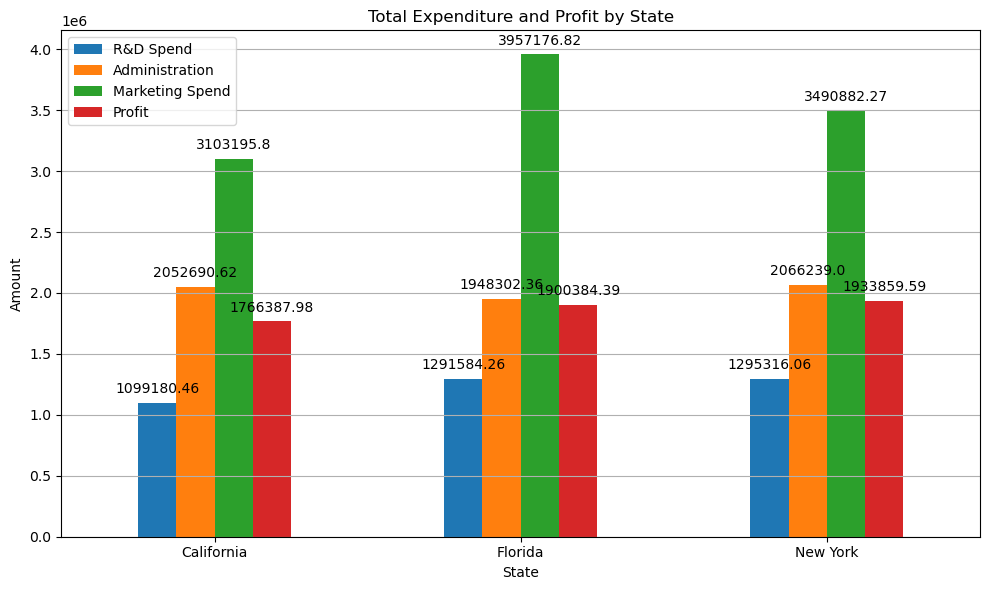

In [9]:
# Bar graph to analyze 'State' catagorical variables column with respect to other columns

state_grouped = startup.groupby('State').sum()

# Plotting the grouped bar graph
ax = state_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Total Expenditure and Profit by State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

<span style="color:Green">
    
### Observation from above:
- Amount spent for marketing is much higher than other expenditures for all the three states. Florida is considerably spent much higher amount for its marketing
- Amount spent for administration is almost same for all the 3 states
- Amount spent for R&D is lesser than other two categories. And spent amount is almost same for all the three states


#

### 2.3: Distribution Plot for all numerical columns

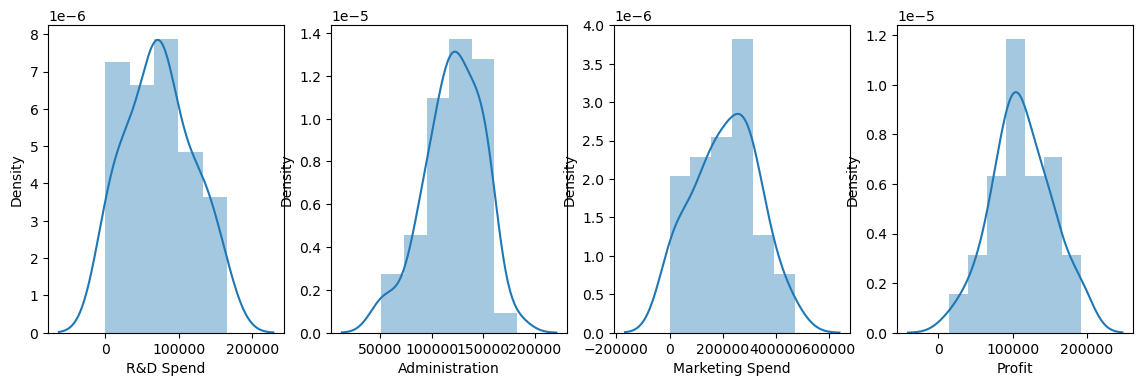

In [10]:
# Distribution Plot with Skewness

plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
sns.distplot(startup['R&D Spend'])
plt.subplot(1,4,2)
sns.distplot(startup['Administration'])
plt.subplot(1,4,3)
sns.distplot(startup['Marketing Spend'])
plt.subplot(1,4,4)
sns.distplot(startup['Profit'])
plt.show()

### 2.4: Correlation between columns

In [11]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


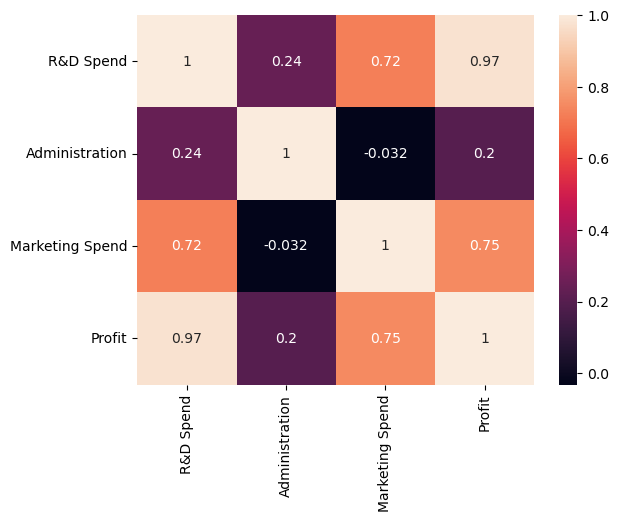

In [12]:
sns.heatmap(startup.corr(), annot = True)
plt.show()

<span style="color:Green">
    
### Observation from above:
- R&D Spend column has 97% and Marketing spend has 75% correlation with respect to profit. whereas Administration has only 20% correlation with Profit.
- R&D and Profit have No skewness: means data distribution is good

#

## Step 3: Preparing the data for modelling 

### 3.1: Creating Dummies for Catagorical columns

In [13]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [14]:
# Creating dummies for 'State' column 
dm = pd.get_dummies(startup['State'])

In [15]:
startup_dm = pd.concat([startup, dm], axis = 'columns')

In [16]:
startup_dm = startup_dm.drop('State', axis = 'columns')

In [17]:
startup_dm.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#

### 3.2: Splitting into Train and Test datasets

In [18]:
# Import train test library from sci-kit learn module

from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(startup_dm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.shape

(35, 7)

In [21]:
df_test.shape

(15, 7)

#

### 3.3: Rescaling the features

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
num_vars = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
25,0.397698,0.828781,0.310798,0.459464,1,0,0
26,0.463284,0.872035,0.301984,0.448762,0,1,0
35,0.282993,0.314337,0.462983,0.389486,0,0,1
17,0.582156,0.880923,0.636574,0.574544,0,0,1
7,0.801353,0.885193,0.729619,0.769153,0,1,0


In [26]:
df_train.describe()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.479871,0.689748,0.489092,0.508198,0.314286,0.342857,0.342857
std,0.265304,0.244887,0.273648,0.246458,0.471008,0.481594,0.481594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330763,0.546419,0.306391,0.393271,0.000000,0.000000,0.000000
50%,0.463284,0.713324,0.562830,0.467981,0.000000,0.000000,0.000000
75%,0.665559,0.900242,0.684940,0.655098,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#

### 3.4: Dividing into X and Y sets for the model building

In [27]:
X_train = df_train.drop('Profit', axis = 'columns')
y_train = df_train['Profit']

In [28]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
25,0.397698,0.828781,0.310798,1,0,0
26,0.463284,0.872035,0.301984,0,1,0
35,0.282993,0.314337,0.462983,0,0,1
17,0.582156,0.880923,0.636574,0,0,1
7,0.801353,0.885193,0.729619,0,1,0


In [29]:
y_train.head()

25    0.459464
26    0.448762
35    0.389486
17    0.574544
7     0.769153
Name: Profit, dtype: float64

#

## Step 4: Building and Training The Model

### 4.1: Create and Fit the model

In [30]:
# Import statmodels libraries for adding constant value to the model
import statsmodels.api as sm

In [31]:
# Adding constant
X_train_sm = sm.add_constant(X_train)

# Create model with all available variables
lr_model = sm.OLS(y_train, X_train_sm)

#fit
startup_lr_model = lr_model.fit()

#To print Summary
startup_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.87e-20
Time:                        17:44:53   Log-Likelihood:                 59.275
No. Observations:                  35   AIC:                            -106.5
Df Residuals:                      29   BIC:                            -97.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0524      0.022      2.398      0.023       0.008       0.097
R&D Spend           0.8758      0.047     18.696      0.000       0.780       0.972
Administration     -0.0190      0.037     -0.515      0.610      -0.094       0.056
Marketing Spend     0.0647      0.044      1.455      0.156      -0.026       0.156
California          0.0358      0.015      2.443      0.021       0.006       0.066
Florida             0.0147      0.014      1.043      0.306      -0.014       0.044
New York            0.0019      0.014      0.138      0.891      -0.026       0.030
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   2.640
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.388
Skew:                          -0.245   Prob(JB):                        0.824
Kurtosis:                       2.840   Cond. No.                     1.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.96e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<span style="color:Green">
    
### Observation from above:
- R-squared value for the model is 0.966 which shows model is able to explain variance precisely 
- Prob(F-Statistics) is nearly zero which explains overall model fit is significant
- P values of Newyork and Administration variables are 0.891 and 0.610 which are higher, indicates that both variables are insignificant. Hence dropping both variables

#

### 4.2: Compute VIF to analyze correlation of variances

In [32]:
# Import VIF library from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values( by = 'VIF', ascending = False)
vif

,Features,VIF
4,Florida,4.95
5,New York,4.87
3,California,4.77
0,R&D Spend,2.20
2,Marketing Spend,2.11
1,Administration,1.16


<span style="color:Green">
    
### Observation from above:
- VIF of Features such as Florida, New York and California are higher. 
- Dropping New York column as both P-value and VIF are higher than usual range

#

### 4.3 Model Building 2
- Drop **'New York'** Column

In [34]:
# Drop 'New York' column
X_train_sm = X_train_sm.drop(['New York'], axis = 'columns')

In [35]:
lr_model = sm.OLS(y_train, X_train_sm)

#fit
startup_lr_model = lr_model.fit()

#To print Summary
startup_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.87e-20
Time:                        17:44:54   Log-Likelihood:                 59.275
No. Observations:                  35   AIC:                            -106.5
Df Residuals:                      29   BIC:                            -97.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0543      0.031      1.744      0.092      -0.009       0.118
R&D Spend           0.8758      0.047     18.696      0.000       0.780       0.972
Administration     -0.0190      0.037     -0.515      0.610      -0.094       0.056
Marketing Spend     0.0647      0.044      1.455      0.156      -0.026       0.156
California          0.0339      0.021      1.630      0.114      -0.009       0.076
Florida             0.0129      0.021      0.624      0.537      -0.029       0.055
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   2.640
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.388
Skew:                          -0.245   Prob(JB):                        0.824
Kurtosis:                       2.840   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Checking VIF values of variances
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values( by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,14.21
1,R&D Spend,2.20
3,Marketing Spend,2.11
5,Florida,1.40
4,California,1.37
2,Administration,1.16


<span style="color:Green">
    
### Observation from above:
- VIF of Features are well within expected range of 5. 
- Dropping Administration column as P-value is 0.61 which is higher than acceptable range

#

### 4.3 Model Building 3
- Drop **'Administration'** Column

In [37]:
# Drop 'Administration' column
X_train_sm = X_train_sm.drop(['Administration'], axis = 'columns')

In [38]:
lr_model = sm.OLS(y_train, X_train_sm)

#fit
startup_lr_model = lr_model.fit()

#To print Summary
startup_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     214.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.36e-21
Time:                        17:44:54   Log-Likelihood:                 59.115
No. Observations:                  35   AIC:                            -108.2
Df Residuals:                      30   BIC:                            -100.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0429      0.022      1.986      0.056      -0.001       0.087
R&D Spend           0.8682      0.044     19.754      0.000       0.778       0.958
Marketing Spend     0.0688      0.043      1.592      0.122      -0.019       0.157
California          0.0326      0.020      1.598      0.120      -0.009       0.074
Florida             0.0140      0.020      0.693      0.494      -0.027       0.055
==============================================================================
Omnibus:                        0.552   Durbin-Watson:                   2.602
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.256
Skew:                          -0.209   Prob(JB):                        0.880
Kurtosis:                       2.988   Cond. No.                         9.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Checking VIF values of variances
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values( by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.99
2,Marketing Spend,2.04
1,R&D Spend,1.98
4,Florida,1.38
3,California,1.34


<span style="color:Green">
    
### Observation from above:
- VIF of Features are well within expected range of 5. 
- Dropping 'Florida' column as P-value is 0.494which is higher than acceptable range

#

### 4.3 Model Building 4
- Drop **'Florida'** Column

In [40]:
# Drop 'Administration' column
X_train_sm = X_train_sm.drop(['Florida'], axis = 'columns')

In [41]:
lr_model = sm.OLS(y_train, X_train_sm)

#fit
startup_lr_model = lr_model.fit()

#To print Summary
startup_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     290.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           9.25e-23
Time:                        17:44:55   Log-Likelihood:                 58.837
No. Observations:                  35   AIC:                            -109.7
Df Residuals:                      31   BIC:                            -103.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0480      0.020      2.392      0.023       0.007       0.089
R&D Spend           0.8654      0.043     19.944      0.000       0.777       0.954
Marketing Spend     0.0752      0.042      1.793      0.083      -0.010       0.161
California          0.0259      0.018      1.454      0.156      -0.010       0.062
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   2.634
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.144
Skew:                          -0.150   Prob(JB):                        0.931
Kurtosis:                       2.905   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values( by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.16
1,R&D Spend,1.97
2,Marketing Spend,1.95
3,California,1.05


<span style="color:Green">
    
### Observation from above:
- VIF of Features and P-Values of all variances are well within expected range. 
- Hence proceeding towards Model Prediction and evaluation on test set

#

## Step 5: Prediction and Evaluation on Test Set

### 5.1: Rescaling the Test Set

In [43]:
df_test.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
6,134615.46,147198.87,127716.82,156122.51,1,0,0
36,28663.76,127056.21,201126.82,90708.19,0,1,0
37,44069.95,51283.14,197029.42,89949.14,1,0,0
28,66051.52,182645.56,118148.20,103282.38,0,1,0
43,15505.73,127382.30,35534.17,69758.98,0,0,1


In [44]:
num_vars = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### 5.2: Splitting test sets into X_test and y_test


In [45]:
X_test = df_test.drop('Profit', axis = 'columns')
y_test = df_test['Profit']

In [46]:
X_train_columns_ref = X_train_sm[X_train_sm.columns]
X_train_columns_ref= X_train_columns_ref.drop('const', axis=1)
X_train_columns_ref.columns

Index(['R&D Spend', 'Marketing Spend', 'California'], dtype='object')

In [47]:
X_test_new = X_test[X_train_columns_ref.columns]

In [48]:
# Adding constant to the test dataset
X_test_new = sm.add_constant(X_test_new)


### 5.3: Evaluation of test via comparison of y_pred and y_test

In [49]:
# Making predictions by 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = sm.OLS(y_train,X_train_sm).fit()
y_pred = lm.predict(X_test_new)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9122789263705183

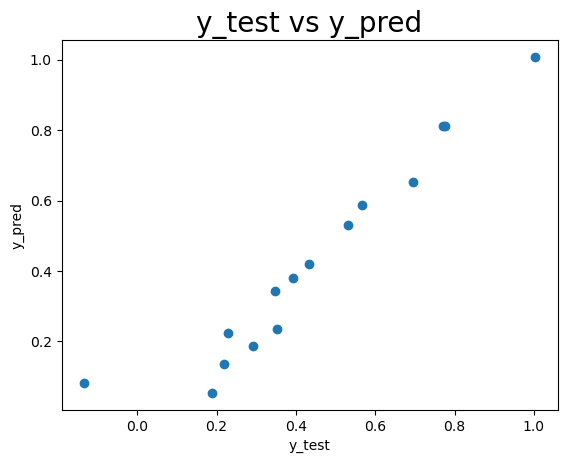

In [51]:
# Plotting y_test and y_pred to understand the spread.

plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test')                        
plt.ylabel('y_pred') 
plt.show()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     290.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           9.25e-23
Time:                        17:44:56   Log-Likelihood:                 58.837
No. Observations:                  35   AIC:                            -109.7
Df Residuals:                      31   BIC:                            -103.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0480      0.020     

<span style="color:Green">

### Observation: 

- **R-sqaured and Adjusted R-squared (extent of fit)** - 0.966 and 0.962 - 96% variance explained.
- **F-stats and Prob(F-stats) (overall model fit)** - 290.1 and 9.25e-23(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
- **p-values** - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.